In [ ]:
!pip install tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# builder = tfds.ImageFolder('f://t0//imagclass/')
# print(builder.info)  # num examples, labels... are automatically calculated
# ds = builder.as_dataset(split='train', shuffle_files=True)
#tfds.show_examples(ds, builder.info)

In [58]:
dataset = keras.preprocessing.image_dataset_from_directory(
  'f://t0//imagclass/train', batch_size=64, image_size=(95, 150),label_mode='categorical',color_mode='grayscale')

Found 1741 files belonging to 9 classes.


In [5]:
tf.random.set_seed(261284)
def make_model1(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)

    x = layers.Conv2D(64, (3,3), activation='relu', strides=(1, 1), kernel_initializer='he_uniform', padding="same")(x)
    x = layers.Conv2D(64, (3,3), activation='relu', strides=(1, 1), kernel_initializer='he_uniform', padding="same")(x)
    x=layers.MaxPool2D((2, 2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu', strides=(1, 1), kernel_initializer='he_uniform', padding="same")(x)
    x = layers.Conv2D(128, (3,3), activation='relu', strides=(1, 1), kernel_initializer='he_uniform', padding="same")(x)
    x=layers.MaxPool2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(256, (3,3), activation='relu', strides=(1, 1), kernel_initializer='he_uniform', padding="same")(x)
    x = layers.Conv2D(256, (3,3), activation='relu', strides=(1, 1), kernel_initializer='he_uniform', padding="same")(x)
    x=layers.MaxPool2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)
    outputs = layers.Dense(9, activation='softmax')(x)
    return keras.Model(inputs, outputs)
model = make_model1(input_shape=(95,150,1), num_classes=9)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 95, 150, 1)]      0         
_________________________________________________________________
rescaling (Rescaling)        (None, 95, 150, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 95, 150, 64)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 150, 64)       36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 75, 128)       147584

In [ ]:
for aa, _ in ds.take(1):
  print(aa[1])

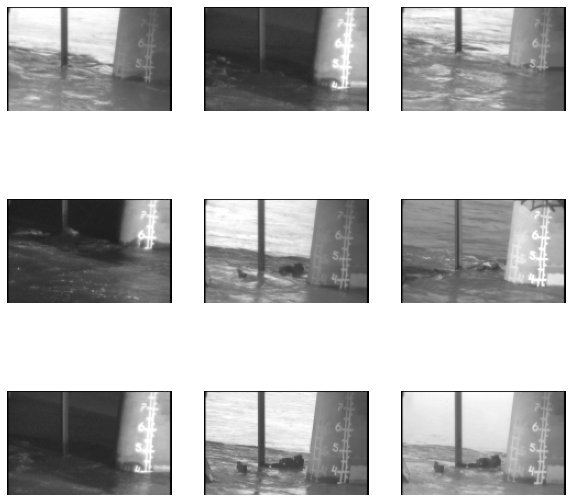

In [6]:
ds=ds.shuffle(10000).batch(100)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in dataset.take(1):
    for i in range(9):        
         ax = plt.subplot(3, 3, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
         plt.axis("off")    




In [7]:
epochs = 40

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

# compile model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
#    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,momentum=0.9,centered=True),
    #optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history=model.fit(
    dataset, epochs=epochs, callbacks=callbacks,
)

Epoch 1/40
28/28 [==============================] - 510s 18s/step - loss: 3.2987 - accuracy: 0.2104
Epoch 2/40
28/28 [==============================] - 501s 18s/step - loss: 1.5132 - accuracy: 0.4635
Epoch 3/40
28/28 [==============================] - 491s 17s/step - loss: 1.2146 - accuracy: 0.5921
Epoch 4/40
28/28 [==============================] - 492s 18s/step - loss: 0.6637 - accuracy: 0.7430
Epoch 5/40
28/28 [==============================] - 492s 18s/step - loss: 0.4670 - accuracy: 0.8247
Epoch 6/40
28/28 [==============================] - 487s 17s/step - loss: 0.3328 - accuracy: 0.8624
Epoch 7/40
28/28 [==============================] - 494s 18s/step - loss: 0.2627 - accuracy: 0.8937
Epoch 8/40
28/28 [==============================] - 493s 18s/step - loss: 0.2001 - accuracy: 0.9222
Epoch 9/40
28/28 [==============================] - 487s 17s/step - loss: 0.1481 - accuracy: 0.9491
Epoch 10/40
28/28 [==============================] - 484s 17s/step - loss: 0.1240 - accuracy: 0.9617

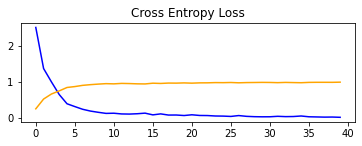

In [8]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['accuracy'], color='orange', label='test')	
	plt.show()
	plt.close()
summarize_diagnostics(history)

In [67]:
datasettest = keras.preprocessing.image_dataset_from_directory(
  'f://t0//imagclass/test',  image_size=(95, 150),label_mode='categorical',color_mode='grayscale')

Found 190 files belonging to 9 classes.


In [93]:
import numpy as np
def itogpredict(inp):
    images, labels = tuple(zip(*inp))
    math=0
    count=0
    for i in range(len(images)):
        pred_itog=model.predict(x=images[i])
        aa=np.argmax(pred_itog, axis=1)           
        bb=np.argmax(labels[i], axis=1)        
        math=math+np.sum(aa==bb)        
        count=count+len(labels[i])        
    print("точность {} %".format(math/count))
itogpredict(datasettest)

точность 0.6578947368421053 %


In [96]:
import os
#сохраним модель
MODEL_DIR = "F:\\t0\\model"
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')


export_path = F:\t0\model\1

INFO:tensorflow:Assets written to: F:\t0\model\1\assets


INFO:tensorflow:Assets written to: F:\t0\model\1\assets



Saved model:
